### Competition : [Data Science London + Scikit-learn](https://www.kaggle.com/c/data-science-london-scikit-learn)
## referenced kernels
- [Aman Nagariya](https://www.kaggle.com/aman9d/data-science-london-scikit)

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [52]:
# 檢視訓練樣本資料
X_train_df = pd.read_csv('data/d48/train.csv', header=None)
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


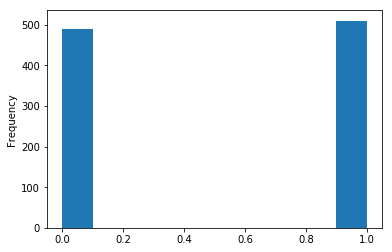

In [56]:
# 檢視訓練標籤資料
y_train_df = pd.read_csv('data/d48/trainLabels.csv', header=None)
# 0或1的樣本數量差不多一樣
y_train_df[0].plot.hist()

In [58]:
# 這裡的X_test_df是我們最後要用調校好的模型進行預測，並把結果sumit回kaggle的「測試」資料
X_test_df = pd.read_csv('data/d48/test.csv', header=None)
print(X_test_df.shape)
X_test_df.describe()

(9000, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.011814,0.004261,-0.001708,0.008614,1.262429,0.006003,0.480585,-0.017228,0.006883,-0.006664,...,-0.018914,0.007282,-0.476895,0.016175,-0.508713,-0.002295,0.451234,-0.002042,-1.003258,0.539873
std,1.009514,1.011432,0.996685,0.989010,4.527492,0.999623,2.102394,2.204673,0.989207,0.991570,...,1.003450,1.003326,2.202519,1.015779,2.097448,1.008415,2.187677,1.000152,1.979629,2.011646
min,-3.568633,-4.238067,-3.587473,-3.646144,-17.296514,-3.500646,-9.157707,-7.867021,-4.037177,-3.666707,...,-4.545617,-3.914329,-8.510309,-4.702577,-8.860839,-3.579675,-9.034930,-3.820679,-8.174851,-7.945400
25%,-0.669886,-0.678792,-0.665240,-0.662560,-1.669099,-0.688766,-0.894049,-1.521762,-0.654169,-0.665439,...,-0.689220,-0.664532,-1.986040,-0.673810,-1.908190,-0.689363,-1.071005,-0.667359,-2.293291,-0.717376
50%,0.006104,0.010758,0.007384,0.009027,1.123982,0.011476,0.534536,-0.021020,-0.006291,-0.005408,...,-0.033990,-0.003370,-0.459278,0.013170,-0.481508,-0.000858,0.419585,-0.003255,-1.004007,0.637040
75%,0.703350,0.684755,0.658111,0.683506,4.002391,0.690966,1.890960,1.460165,0.676678,0.654349,...,0.655757,0.682167,1.026158,0.691832,0.957351,0.666330,1.938350,0.667539,0.321595,1.897324
max,3.843549,3.538868,3.716102,3.667817,20.551947,4.565496,7.882210,7.391208,3.706671,3.322649,...,3.624639,4.251316,8.598575,4.157051,6.851583,3.911722,8.624332,3.860112,7.125848,9.464492


In [59]:
# 把訓練樣本拆分成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size = 0.2)
print(X_train.shape, X_test.shape)

(800, 40) (200, 40)


In [60]:
# 在不做任何特徵縮放、不挑選特徵、不調整的情況下，先試試LogisticRegresion、DecisionTree、KNN
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
print('Logiscic Regression: ' , accuracy_score(y_test, y_pred))

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print('Decision Tree: ' , accuracy_score(y_test, y_pred))

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
print('KNN: ' , accuracy_score(y_test, y_pred))

Logiscic Regression:  0.795
Decision Tree:  0.725
KNN:  0.865


In [62]:
# 對KNN用GridSearch調參 
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’,
# leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)[source]¶
parameters = {
    'n_neighbors' : [3, 5, 7, 9, 11, 13],
    'weights' : ['uniform', 'distance']
 }
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
search_result = grid_search.fit(X_train, y_train)
print(search_result.best_score_)
print(search_result.best_params_)

0.905
{'n_neighbors': 13, 'weights': 'uniform'}


In [87]:
# 用找到的最佳參數建立KNNClassifier, 用它來產生最終的預測
clf_best_knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform')
clf_best_knn.fit(X_train, y_train)
y_final_pred = clf_best_knn.predict(X_test_df)

id_series = np.arange(1, y_final_pred.shape[0]+1)
submit_df = pd.DataFrame(data = {'Id' : id_series, 'Solution' : y_final_pred})

submit_df.to_csv('data/d48/submission_kenhutaiwan.csv', index=False)